In [1]:
import numpy as np

# -------------------------------------------------------------
# Script: Fresado.ipynb
# Curso : Procesos de Manufactura II (PM2)
# Autor : dokiun
# Fecha : 2025-09-13
# Nota  : Basado en las diapositivas presentadas en clase.
# -------------------------------------------------------------

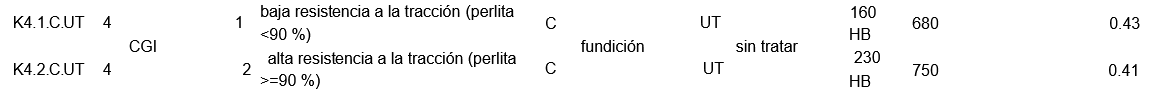

# Primer punto (Dientes rectos)

**Consulte según su material**
https://www.studocu.com/co/document/universidad-nacional-de-colombia/procesos-de-manufactura-ii/codigos-mc-de-sandvik/9366249



In [2]:
# Parámetros de material
# https://www.studocu.com/co/document/universidad-nacional-de-colombia/procesos-de-manufactura-ii/codigos-mc-de-sandvik/9366249
kc1 = 750
mc  = 0.41
# Inputs
Dc = 185 # mm
zn = 11
kappa_deg = 90.0 #deg
kappa = np.deg2rad(kappa_deg) #rad
# ángulo de desprendimiento
gamma0 = 0 #deg
v = 70 # m/min
ac_max = 0.25 # mm
ap = 7 # mm
dt = np.nan
ae = (2/3)*dt

In [3]:
# 1
dt = Dc + (2*ap)/np.tan(kappa) # mm
# 2
ae = (2/3)*dt # mm
# si v=(np.pi*dt*nt)/1000
# 3
nt = (v*1000)/(np.pi*dt) # 1/min
# ángulos de entrada/salida
arg = np.clip(1 - 2*ae/dt, -1.0, 1.0)
phi_raw = np.arccos(arg)
phi1 = min(phi_raw, np.pi - phi_raw)   # entrada (menor)
phi2 = max(phi_raw, np.pi - phi_raw)   # salida (mayor)

# phi_max (donde sin(phi) es máximo)
if (phi1 <= np.pi/2) and (np.pi/2 <= phi2):
    phi_max = np.pi/2
else:
    phi_max = phi1   # (sin(phi1) == sin(phi2))

# 4 fz
fz = ac_max / (np.sin(kappa)*np.sin(phi_max))   # mm
# 5 vf
vf = fz * zn * nt # mm/min
# 6 zw
zw = ae * ap * vf # mm^3/min
# 7 phi1
# 8 a_c a la entrada
ac_1 = fz * np.sin(phi1) * np.sin(kappa) # mm
# 9 am
am = fz*np.sin(kappa)*np.sqrt(ae/dt) # mm
# 10
kc = kc1 * (am ** (-mc)) * (1 - gamma0/100.0)
# 11
Pc = (kc*ap*ae*vf)/(60*10**6) # kW
# 12
Mc = (Pc*30*10**3)/(np.pi*nt) # Nm

In [4]:
print(f"dt = {dt:.4f} mm")
print(f"ae = {ae:.4f} mm")
print(f"nt = {nt:.2f} 1/min")
print(f"fz = {fz:.5f} mm/diente")
print(f"vf = {vf:.2f} mm/min")
print(f"zw = {zw:.2f} mm^3/min")
print(f"phi1 = {np.rad2deg(phi1):.4f} °")
#print(f"phi2 = {np.rad2deg(phi2):.4f} °")
#print(f"phi_max = {np.rad2deg(phi_max):.4f} °")
print(f"ac_1 = {ac_1:.5f} mm")
print(f"am = {am:.5f} mm")
print(f"kc = {kc:.2f} N/mm^2")
print(f"Pc = {Pc:.6f} kW")
print(f"Mc = {Mc:.6f} N·m")

dt = 185.0000 mm
ae = 123.3333 mm
nt = 120.44 1/min
fz = 0.25000 mm/diente
vf = 331.21 mm/min
zw = 285948.38 mm^3/min
phi1 = 70.5288 °
ac_1 = 0.23570 mm
am = 0.20412 mm
kc = 1438.81 N/mm^2
Pc = 6.857108 kW
Mc = 543.670668 N·m


# Segundo punto (redondos)

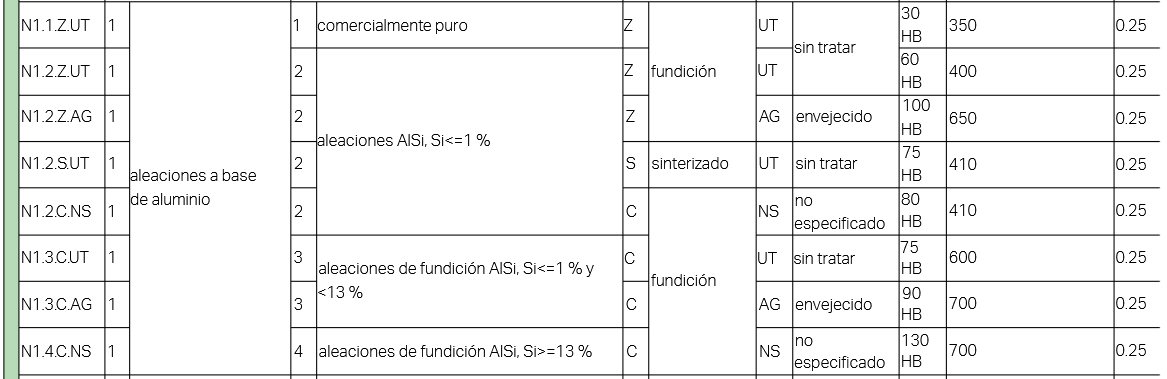

In [5]:
kc1 = 650.0    # N/mm^2  (Al 7075-T6)
mc  = 0.25     # exponente
gamma0 = -7.0   # deg (factor (1 - gamma0/100) = 0.95)

# ---------------- Inputs de proceso -------------------------
Dc = 150.0      # mm, diámetro nominal fresa
iC = 11.0       # mm, diámetro del inserto redondo
zn = 9
v  = 75.0      # m/min
ac_max = 0.3   # mm
ap = 4.5        # mm

# --------- 1) Ángulo de posición efectivo (insertos redondos) ----------
R = iC / 2.0
# kappa_r = arccos(1 - ap/R)
kappa = np.arccos(np.clip(1.0 - ap/R, -1.0, 1.0))
kappa_deg = np.degrees(kappa)

# --------- 2) Diámetro efectivo de fresado -----------------------------
dt = Dc + np.sqrt((iC)**2-(iC-2*ap)**2)    # mm

# --------- 3) Profundidad de corte radial (1/3 dt) --------------------
ae = (1/3) * dt                 # mm

# --------- 4) Frecuencia rotacional -----------------------------------
nt = (v*1000.0) / (np.pi*dt)        # 1/min

# --------- 5) Ángulos de entrada/salida (inmersión radial) ------------
arg = np.clip(1.0 - 2.0*ae/dt, -1.0, 1.0)
phi_a = np.arccos(arg)          # ~ 109.47°
phi_b = np.pi - phi_a           # ~ 70.53°

# Si es corte concordante y tu convención define "entrada" como el mayor ángulo:
corte_concordante = True  # <-- pon False si querés la convención contraria

if corte_concordante:
    phi1 = max(phi_a, phi_b)    # entrada
    phi2 = min(phi_a, phi_b)    # salida
else:
    phi1 = min(phi_a, phi_b)    # entrada
    phi2 = max(phi_a, phi_b)    # salida

phi1_deg = np.degrees(phi1)
phi2_deg = np.degrees(phi2)

# φ_max: 90° si cae dentro; si no, el extremo más cercano
phi_min, phi_max = min(phi1, phi2), max(phi1, phi2)
phi_max_deg = np.degrees(phi_max)

# --------- 6) fz desde a_c,max -----------------------------------------
fz = ac_max / (np.sin(kappa)*np.sin(phi_max))   # mm/diente

# --------- 7) Velocidad de avance --------------------------------------
vf = fz * zn * nt                                # mm/min

# --------- 8) Tasa de remoción de material -----------------------------
zw = ae * ap * vf                                 # mm^3/min

# --------- 9) Espesor medio de viruta ----------------------------------
am = fz * np.sin(kappa) * np.sqrt(ae/dt)          # mm

# --------- 10) Fuerza específica de corte ------------------------------
kc = kc1 * (am**(-mc)) * (1.0 - gamma0/100.0)     # N/mm^2

# --------- 11) Potencia de corte ---------------------------------------
Pc = (kc * zw) / 60_000_000.0                     # kW

# --------- 12) Par de corte --------------------------------------------
Mc = (9550.0 * Pc) / nt                           # N·m

# --------- Mostrar resultados ------------------------------------------
print(f"kappa_r = {kappa_deg:.4f} °")
print(f"dt = {dt:.3f} mm")
print(f"ae = {ae:.3f} mm")
print(f"nt = {nt:.2f} 1/min")
print(f"phi1 = {phi1_deg:.4f} °")
#print(f"phi2 = {np.rad2deg(phi2):.4f} °")
#print(f"phi_max = {phi_max_deg:.4f} °")
print(f"fz = {fz:.5f} mm/diente")
print(f"vf = {vf:.2f} mm/min")
print(f"zw = {zw:.2f} mm^3/min")
print(f"am = {am:.6f} mm")
print(f"kc = {kc:.2f} N/mm^2")
print(f"Pc = {Pc:.6f} kW")
print(f"Mc = {Mc:.6f} N·m")

kappa_r = 79.5243 °
dt = 160.817 mm
ae = 53.606 mm
nt = 148.45 1/min
phi1 = 109.4712 °
fz = 0.32359 mm/diente
vf = 432.33 mm/min
zw = 104289.94 mm^3/min
am = 0.183712 mm
kc = 1062.34 N/mm^2
Pc = 1.846520 kW
Mc = 118.789237 N·m
